In [ ]:
import keras
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from keras.datasets import mnist

In [ ]:
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(f"shape of x_train {x_train_full.shape}")

shape of x_train (60000, 28, 28)


In [ ]:
print(f"shape of y_train {y_train_full.shape}")

shape of y_train (60000,)


In [ ]:
y_train_full

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

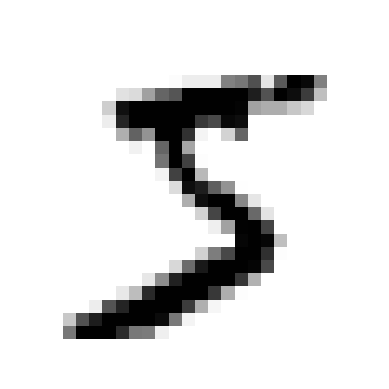

In [ ]:
plt.imshow(x_train_full[0], cmap="binary")
plt.axis('off')
plt.show()

<Axes: >

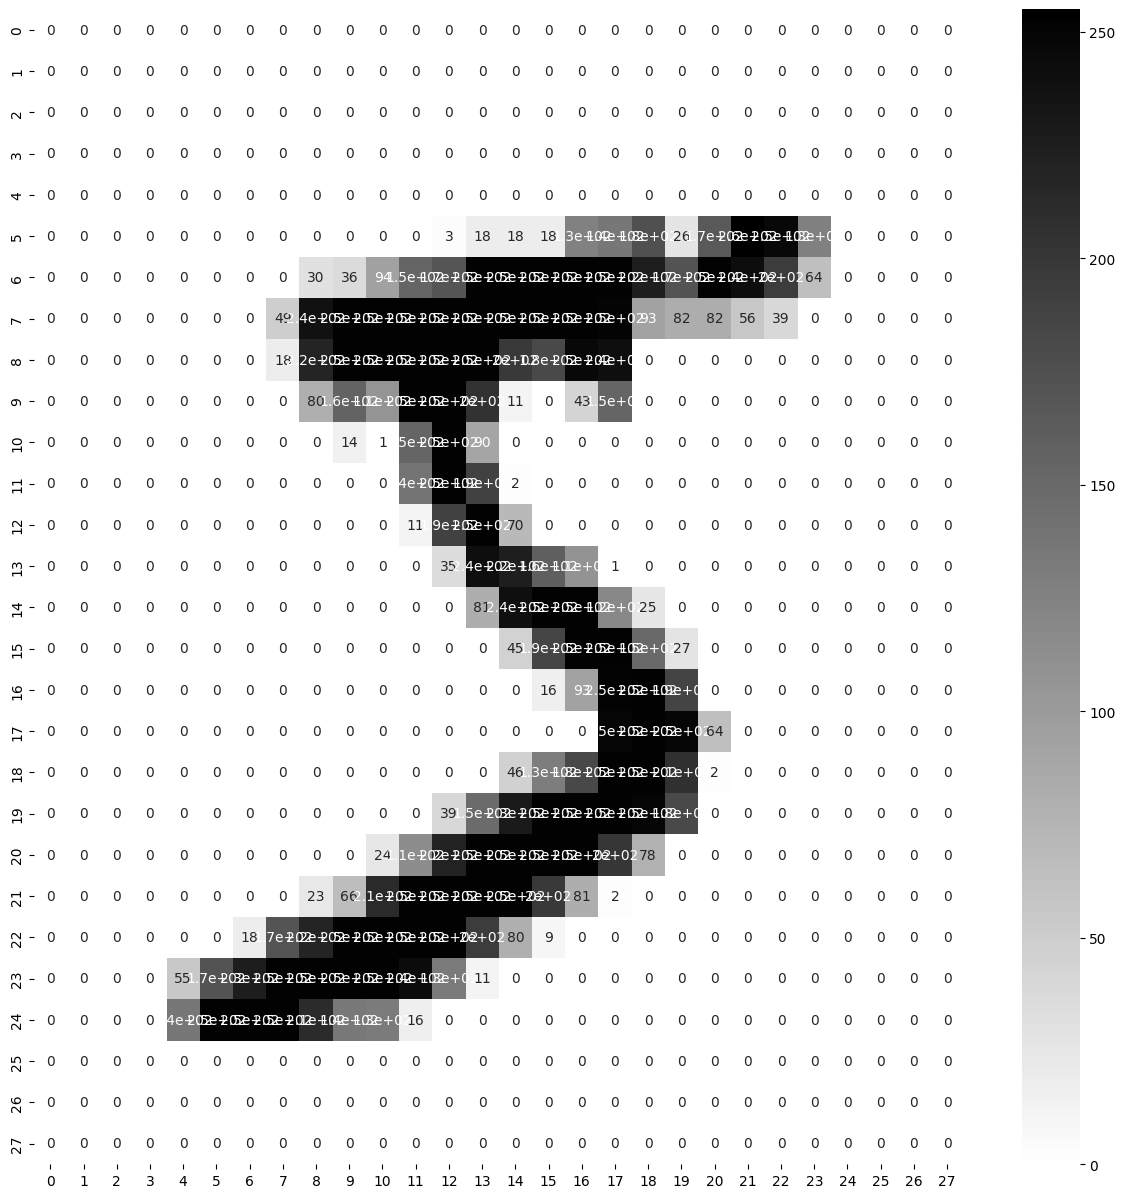

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(x_train_full[0], cmap="binary", annot=True)

In [ ]:
x_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
x_train_full = x_train_full / 255

In [ ]:
x_train_full[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
x_valid, x_train = x_train_full[:5000], x_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
x_valid.shape

(5000, 28, 28)

In [ ]:
x_train.shape

(55000, 28, 28)

In [ ]:
x_test = x_test/255

In [ ]:
model = keras.Sequential(
    [
        keras.layers.Flatten(input_shape=[28,28]),
        keras.layers.Dense(300, activation="relu"),
        keras.layers.Dense(100, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
    ]
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
784*300+300

235500

In [ ]:
300*100+100

30100

In [ ]:
100*10+10

1010

In [ ]:
model.compile(
    optimizer="SGD",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
hisotry = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.6293 - accuracy: 0.8369 - val_loss: 0.3134 - val_accuracy: 0.9136
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2847 - accuracy: 0.9187 - val_loss: 0.2420 - val_accuracy: 0.9328
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2319 - accuracy: 0.9333 - val_loss: 0.2035 - val_accuracy: 0.9456
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1977 - accuracy: 0.9434 - val_loss: 0.1761 - val_accuracy: 0.9506
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1723 - accuracy: 0.9501 - val_loss: 0.1601 - val_accuracy: 0.9548
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1529 - accuracy: 0.9555 - val_loss: 0.1444 - val_accuracy: 0.9588
Epoch 7/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.1376 - accuracy: 0.9600 - val_loss: 0.1320 - val_accura

In [ ]:
hisotry.history

{'loss': [0.6292604207992554,
  0.28472694754600525,
  0.23187138140201569,
  0.1977461576461792,
  0.17233048379421234,
  0.152883842587471,
  0.13763970136642456,
  0.12412747740745544,
  0.11306370794773102,
  0.10388336330652237],
 'accuracy': [0.8368545174598694,
  0.9186909198760986,
  0.9333090782165527,
  0.9434182047843933,
  0.9500908851623535,
  0.9554908871650696,
  0.9600363373756409,
  0.964054524898529,
  0.967090904712677,
  0.970090925693512],
 'val_loss': [0.3134135901927948,
  0.24196137487888336,
  0.2035444974899292,
  0.1761389672756195,
  0.16013149917125702,
  0.14443953335285187,
  0.13203008472919464,
  0.12626056373119354,
  0.11718270182609558,
  0.11034314334392548],
 'val_accuracy': [0.9136000275611877,
  0.9327999949455261,
  0.9455999732017517,
  0.9506000280380249,
  0.954800009727478,
  0.9588000178337097,
  0.9635999798774719,
  0.9646000266075134,
  0.9660000205039978,
  0.9684000015258789]}

<Axes: >

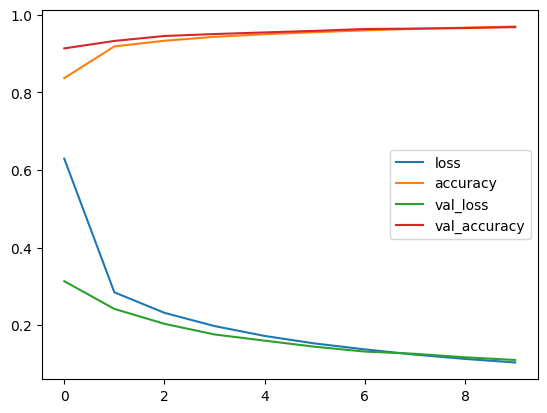

In [ ]:
pd.DataFrame(hisotry.history).plot()

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.1100 - accuracy: 0.9663


[0.10998028516769409, 0.9663000106811523]

In [ ]:
import os
import time

In [ ]:
def get_model_name_to_save(model_dir="TRAINED_MODEL"):
  os.makedirs(model_dir, exist_ok=True)
  model_name = time.strftime('MODEL_%Y_%m_%d_%H_%M_%S_.h5')
  full_path = os.path.join(model_dir, model_name)
  print(f"the model will be saved in {full_path}")
  return full_path

In [ ]:
path = get_model_name_to_save()

the model will be saved in TRAINED_MODEL/MODEL_2024_01_07_06_44_33_.h5


In [ ]:
keras.models.save_model(model=model, filepath=path)

<ipython-input-40-af9dac18dd4c>:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  keras.models.save_model(model=model, filepath=path)


In [ ]:
loaded_model = keras.models.load_model(path)

In [ ]:
loaded_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1100 - accuracy: 0.9663


[0.10998028516769409, 0.9663000106811523]

In [ ]:
result = model.predict(x_test[:3])

1/1 [==============================] - 0s 132ms/step


In [ ]:
result

array([[9.56748045e-05, 6.42364569e-07, 1.33976387e-03, 2.75044609e-03,
        3.67893819e-07, 2.47672724e-05, 4.00008560e-09, 9.95256364e-01,
        9.55061550e-05, 4.36536793e-04],
       [1.52835655e-05, 1.02991195e-04, 9.98291671e-01, 7.00737990e-04,
        4.01809530e-10, 4.62007883e-04, 1.41856348e-04, 3.87787757e-09,
        2.85481336e-04, 1.44094281e-09],
       [3.86703723e-05, 9.82841372e-01, 4.56742989e-03, 8.49596865e-04,
        4.68580227e-04, 1.15276163e-03, 7.72005820e-04, 6.71287999e-03,
        2.34473753e-03, 2.51959369e-04]], dtype=float32)

In [ ]:
y_prob = np.argmax(result, axis=1)

In [ ]:
y_prob

array([7, 2, 1])

In [ ]:
y_test[0]

7

In [ ]:
y_test[1]

2

In [ ]:
y_test[2]

1